In [38]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
import fsspec
import json
import pyqg_subgrid_experiments as pse
import pyqg
import pyqg_parameterization_benchmarks as ppb
from pyqg_generative.tools.spectral_tools import spectrum, ave_lev
from pyqg_generative.models.parameterization import *
%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Verification function

In [9]:
def plot_spectral_fluxes(q, psi, q_advection, q_total):
    def expand(var):
        for dim in ['run', 'time']:
            if dim not in var.dims:
                var = var.expand_dims(dim)
        return var
    q = expand(q)
    psi = expand(psi)
    q_advection = expand(q_advection)
    q_total = expand(q_total)
    
    kw_adv = dict(label='q_forcing_advection')
    kw = dict(label='q_forcing_total', ls='--', color='k', xscale='log')
    plt.figure(figsize=(12,3), constrained_layout=True)
    plt.subplot(1,3,1)
    sp = spectrum(type='cospectrum', time=slice(0,1))
    ave_lev(sp(q, q_advection), delta=0.25).plot(**kw_adv)
    ave_lev(sp(q, q_total), delta=0.25).plot(**kw)
    plt.title('Potential enstrophy contribution spectrum')
    plt.legend()
    plt.subplot(1,3,2)
    ave_lev(sp(-psi, q_advection), delta=0.25).plot(**kw_adv)
    ave_lev(sp(-psi, q_total), delta=0.25).plot(**kw)
    plt.title('Total energy contribution spectrum')
    plt.legend()
    plt.subplot(1,3,3)
    sp = spectrum(type='power', time=slice(0,1))
    ave_lev(sp(q_advection), delta=0.25).plot(**kw_adv)
    ave_lev(sp(q_total), delta=0.25).plot(**kw)
    plt.title('Power spectrum')
    plt.legend()

# ------------------------------------------------------------
# -----------------OLD DATASETS --------------------

# Dataset /scratch/zanna/data/pyqg/data/

Correlation =  0.9997593688168982


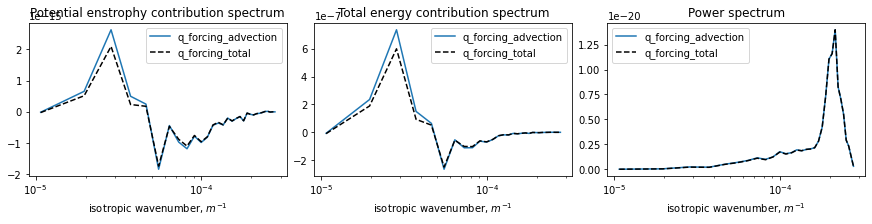

In [96]:
ds = pse.Dataset("/scratch/zanna/data/pyqg/data/transfer/*.nc").isel(run=slice(0,1), time=slice(-1,None))
q = ds.q
psi = ds.streamfunction
q_advection = ds.q_forcing_advection
q_total = ds.q_forcing_total
plot_spectral_fluxes(q, psi, q_advection, q_total)
print('Correlation = ', float(xr.corr(q_total, q_advection)))

Correlation =  0.9996072441275562


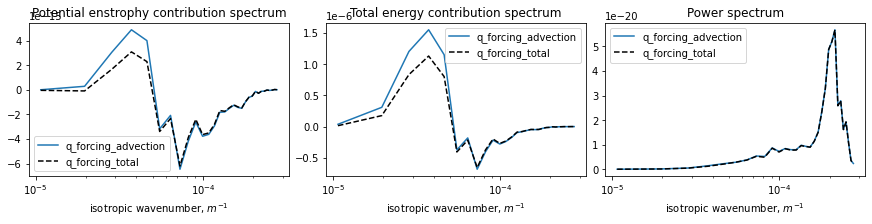

In [62]:
ds = pse.Dataset("/scratch/zanna/data/pyqg/data/test/*.nc").isel(run=slice(12,13), time=slice(-1,None))
q = ds.q
psi = ds.streamfunction
q_advection = ds.q_forcing_advection
q_total = ds.q_forcing_total
plot_spectral_fluxes(q, psi, q_advection, q_total)
print('Correlation = ', float(xr.corr(q_total, q_advection)))

# Dataset /scratch/zanna/data/pyqg/data_builtin_filter/

Correlation =  0.9999999129817861


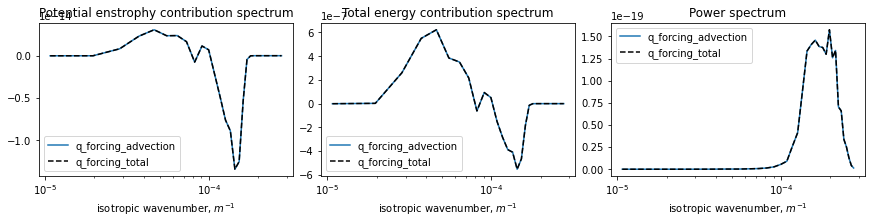

In [81]:
ds = pse.Dataset("/scratch/zanna/data/pyqg/data_builtin_filter/test/*.nc").isel(run=slice(0,1), time=slice(-1,None))
q = ds.q
psi = ds.streamfunction
q_advection = ds.q_forcing_advection
q_total = ds.q_forcing_total
plot_spectral_fluxes(q, psi, q_advection, q_total)
print('Correlation = ', float(xr.corr(q_total, q_advection)))

Correlation =  1.0


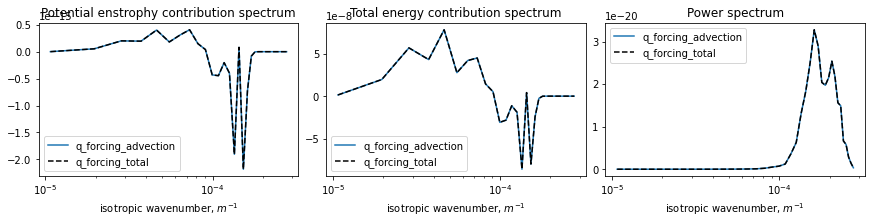

In [82]:
ds = pse.Dataset("/scratch/zanna/data/pyqg/data_builtin_filter/transfer/*.nc").isel(run=slice(0,1), time=slice(-1,None))
q = ds.q
psi = ds.streamfunction
q_advection = ds.q_forcing_advection
q_total = ds.q_forcing_total
plot_spectral_fluxes(q, psi, q_advection, q_total)
print('Correlation = ', float(xr.corr(q_total, q_advection)))

# Dataset /scratch/zanna/data/pyqg/data_realspace_filter/

Correlation =  0.9996315688776314


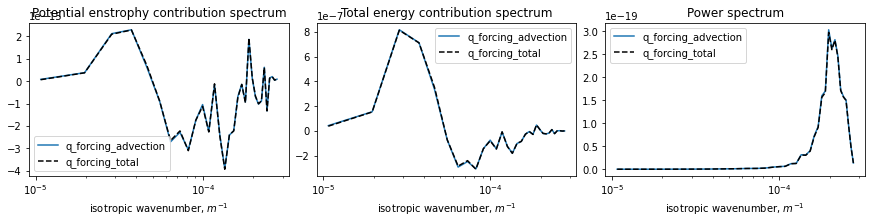

In [83]:
ds = pse.Dataset("/scratch/zanna/data/pyqg/data_realspace_filter/test/*.nc").isel(run=slice(0,1), time=slice(-1,None))
q = ds.q
psi = ds.streamfunction
q_advection = ds.q_forcing_advection
q_total = ds.q_forcing_total
plot_spectral_fluxes(q, psi, q_advection, q_total)
print('Correlation = ', float(xr.corr(q_total, q_advection)))

Correlation =  0.9997109724740381


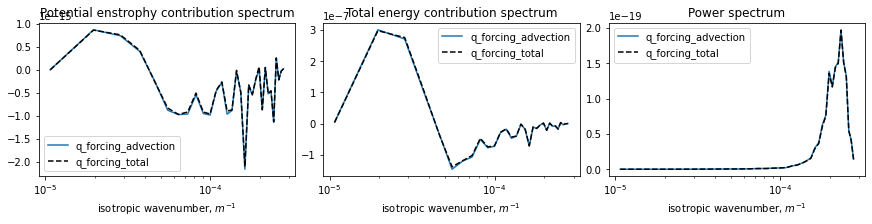

In [84]:
ds = pse.Dataset("/scratch/zanna/data/pyqg/data_realspace_filter/transfer/*.nc").isel(run=slice(0,1), time=slice(-1,None))
q = ds.q
psi = ds.streamfunction
q_advection = ds.q_forcing_advection
q_total = ds.q_forcing_total
plot_spectral_fluxes(q, psi, q_advection, q_total)
print('Correlation = ', float(xr.corr(q_total, q_advection)))

# ------------------------------------------------------------
# -----------------ZARR DATASETS --------------------

# Operator 1

Correlation =  0.999999884389241


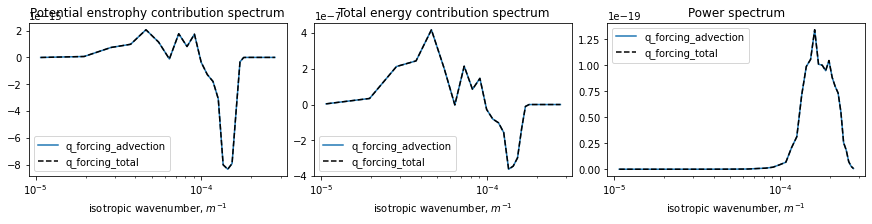

In [85]:
ds = xr.open_zarr(fsspec.get_mapper('/scratch/zanna/data/pyqg/publication/eddy/forcing1.zarr'), consolidated=True).isel(run=slice(0,1), time=slice(-1,None))
q = ds.q
psi = ds.streamfunction
q_advection = ds.q_subgrid_forcing
q_total = ds.dqdt_bar - ds.dqbar_dt
plot_spectral_fluxes(q, psi, q_advection, q_total)
print('Correlation = ', float(xr.corr(q_total, q_advection)))

Correlation =  1.0


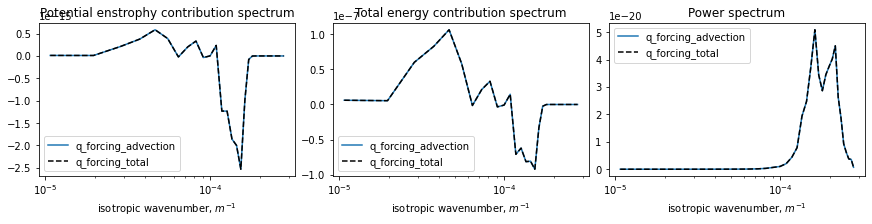

In [86]:
ds = xr.open_zarr(fsspec.get_mapper('/scratch/zanna/data/pyqg/publication/jet/forcing1.zarr'), consolidated=True).isel(run=slice(0,1), time=slice(-1,None))
q = ds.q
psi = ds.streamfunction
q_advection = ds.q_subgrid_forcing
q_total = ds.dqdt_bar - ds.dqbar_dt
plot_spectral_fluxes(q, psi, q_advection, q_total)
print('Correlation = ', float(xr.corr(q_total, q_advection)))

# Operator 2

Correlation =  0.9999934163185802


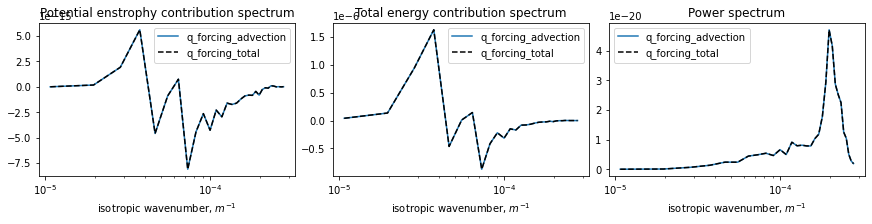

In [87]:
ds = xr.open_zarr(fsspec.get_mapper('/scratch/zanna/data/pyqg/publication/eddy/forcing2.zarr'), consolidated=True).isel(run=slice(0,1), time=slice(-1,None))
q = ds.q
psi = ds.streamfunction
q_advection = ds.q_subgrid_forcing
q_total = ds.dqdt_bar - ds.dqbar_dt
plot_spectral_fluxes(q, psi, q_advection, q_total)
print('Correlation = ', float(xr.corr(q_total, q_advection)))

Correlation =  0.9999923221114032


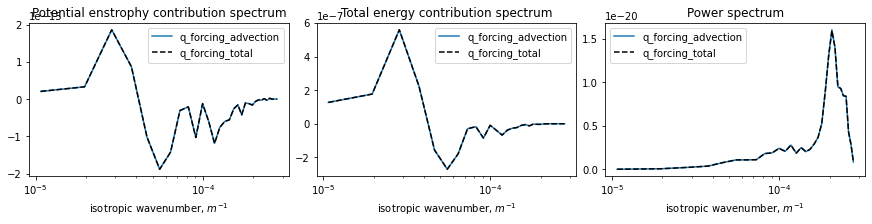

In [88]:
ds = xr.open_zarr(fsspec.get_mapper('/scratch/zanna/data/pyqg/publication/jet/forcing2.zarr'), consolidated=True).isel(run=slice(0,1), time=slice(-1,None))
q = ds.q
psi = ds.streamfunction
q_advection = ds.q_subgrid_forcing
q_total = ds.dqdt_bar - ds.dqbar_dt
plot_spectral_fluxes(q, psi, q_advection, q_total)
print('Correlation = ', float(xr.corr(q_total, q_advection)))

# Operator 3

Correlation =  0.999687039892691


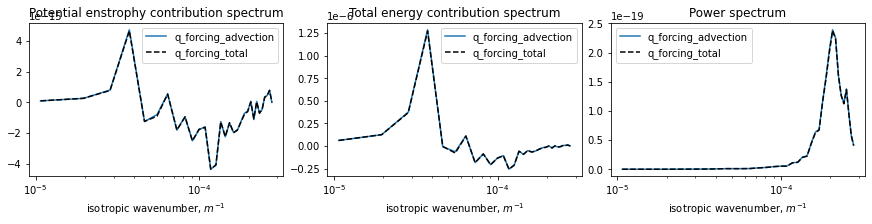

In [89]:
ds = xr.open_zarr(fsspec.get_mapper('/scratch/zanna/data/pyqg/publication/eddy/forcing3.zarr'), consolidated=True).isel(run=slice(0,1), time=slice(-1,None))
q = ds.q
psi = ds.streamfunction
q_advection = ds.q_subgrid_forcing
q_total = ds.dqdt_bar - ds.dqbar_dt
plot_spectral_fluxes(q, psi, q_advection, q_total)
print('Correlation = ', float(xr.corr(q_total, q_advection)))

Correlation =  0.9995959232326359


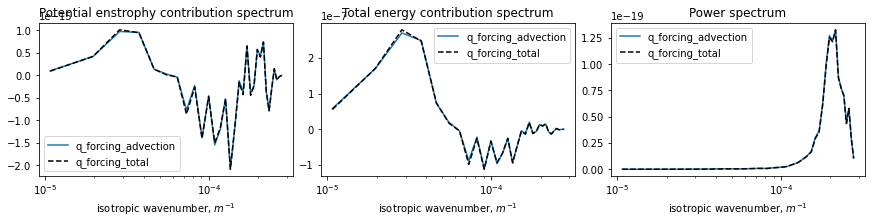

In [90]:
ds = xr.open_zarr(fsspec.get_mapper('/scratch/zanna/data/pyqg/publication/jet/forcing3.zarr'), consolidated=True).isel(run=slice(0,1), time=slice(-1,None))
q = ds.q
psi = ds.streamfunction
q_advection = ds.q_subgrid_forcing
q_total = ds.dqdt_bar - ds.dqbar_dt
plot_spectral_fluxes(q, psi, q_advection, q_total)
print('Correlation = ', float(xr.corr(q_total, q_advection)))

# Computation of subgrid forcing according to pyqg_parameterization_benchmarks repository

### Obtain highres model at statistical equilibrium

In [27]:
ds = pse.Dataset('/scratch/pp2681/pyqg_generative/highres/online_eddy.nc').isel(run=1,time=-1)

In [28]:
# Integrate a bit to initialize model properly
params = EDDY_PARAMS
params.update(dict(nx=256, dt=3600, tmax=10*86400))
m_highres = pyqg.QGModel(**params)
m_highres.q = ds.q.values.astype('float64')
m_highres.run()

INFO:  Logger initialized


In [104]:
op1 = ppb.coarsening_ops.Operator1(m_highres,64)
op2 = ppb.coarsening_ops.Operator2(m_highres,64) 
op3 = ppb.coarsening_ops.Operator3(m_highres,64) 

Correlation =  -1.0000000000000022
Correlation =  -0.9996557507468256
Correlation =  -0.9513224735507841


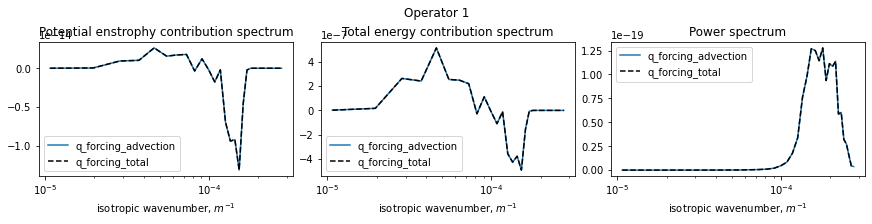

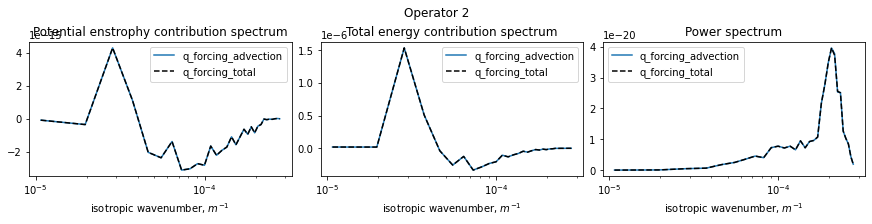

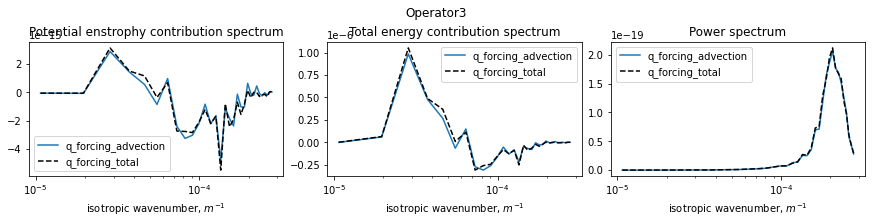

In [105]:
for op, name in zip([op1, op2, op3], 
                    ['Operator 1', 'Operator 2', 'Operator3']):
    q = op.m2.to_dataset().q
    psi = op.m2.to_dataset().p
    q_advection = xr.DataArray(op.subgrid_forcing('q'), dims=('lev', 'y', 'x'))
    q_total = xr.DataArray(op.q_forcing_total, dims=('lev', 'y', 'x'))
    print('Correlation = ', float(xr.corr(q_total, q_advection)))
    plot_spectral_fluxes(q, psi, -q_advection, q_total)
    plt.suptitle(name)

# Computation of subgrid forcing according to pyqg_subgrid_experiments repository

In [40]:
def generate_forcing_dataset(hires=256, lores=64, q_init = None, **kw):
    forcing_params = {}
    pyqg_params = {}
    for k, v in kw.items():
        if k in ['downscaling','filtr','sampling_dist', 'sampling_freq']:
            forcing_params[k] = v
        else:
            pyqg_params[k] = v

    params1 = dict(pse.DEFAULT_PYQG_PARAMS)
    params1.update(pyqg_params)
    params1['nx'] = hires

    params2 = dict(pse.DEFAULT_PYQG_PARAMS)
    params2.update(pyqg_params)
    params2['nx'] = lores

    m1 = pyqg.QGModel(**params1)
    m2 = pyqg.QGModel(**params2)
    
    m1.q = q_init

    ds = pse.run_forcing_simulations(m1, m2, **forcing_params)
    return ds.assign_attrs(pyqg_params=json.dumps(params2))

In [41]:
# Initial condition for fast start
ds = pse.Dataset('/scratch/pp2681/pyqg_generative/highres/online_eddy.nc').isel(run=1,time=-1)
q_init = ds.q.values.astype('float64')

# Operator 2

In [46]:
%time ds = generate_forcing_dataset(tmax=3600*2, q_init = q_init, downscaling='spectral', filtr='guan2020')

INFO:  Logger initialized
INFO:  Logger initialized


CPU times: user 162 ms, sys: 7.92 ms, total: 170 ms
Wall time: 169 ms


Correlation =  1.0000209829316844


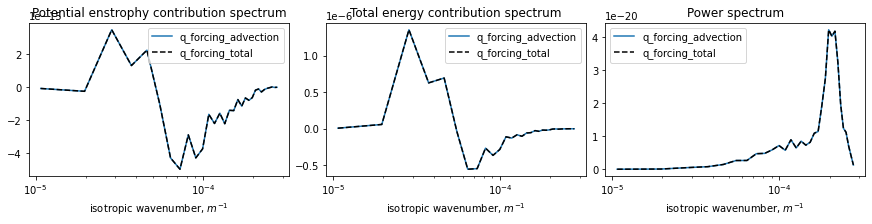

In [47]:
q = ds.q
psi = ds.streamfunction
q_advection = ds.q_forcing_advection
q_total = ds.q_forcing_total
print('Correlation = ', float(xr.corr(q_total, q_advection)))
plot_spectral_fluxes(q, psi, q_advection, q_total)

# Operator 1

In [48]:
%time ds = generate_forcing_dataset(tmax=3600*2, q_init = q_init, downscaling='spectral', filtr='builtin')

INFO:  Logger initialized
INFO:  Logger initialized


CPU times: user 157 ms, sys: 1.05 ms, total: 158 ms
Wall time: 158 ms


Correlation =  1.0000279168105757


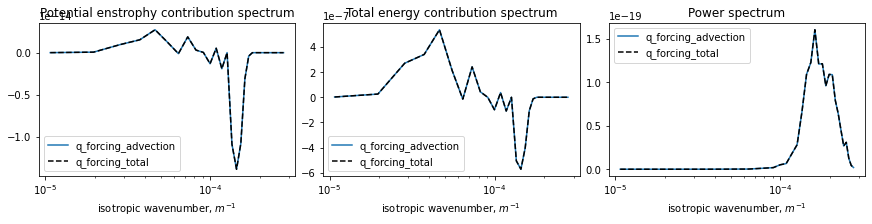

In [50]:
q = ds.q
psi = ds.streamfunction
q_advection = ds.q_forcing_advection
q_total = ds.q_forcing_total
print('Correlation = ', float(xr.corr(q_total, q_advection)))
plot_spectral_fluxes(q, psi, q_advection, q_total)

# Operator 3

In [51]:
%time ds = generate_forcing_dataset(tmax=3600*2, q_init = q_init, downscaling='real', filtr='gcm')

INFO:  Logger initialized
INFO:  Logger initialized


CPU times: user 582 ms, sys: 10.9 ms, total: 593 ms
Wall time: 866 ms


Correlation =  0.9996638424243783


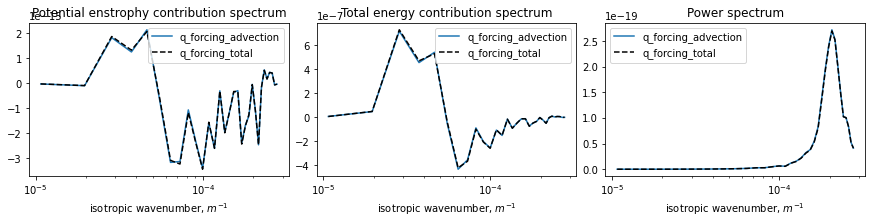

In [52]:
q = ds.q
psi = ds.streamfunction
q_advection = ds.q_forcing_advection
q_total = ds.q_forcing_total
print('Correlation = ', float(xr.corr(q_total, q_advection)))
plot_spectral_fluxes(q, psi, q_advection, q_total)